# Subset CMIP6 Datasets with xarray

xarray: http://xarray.pydata.org/en/stable/index.html

## Example Notebooks

* xclim: https://nbviewer.jupyter.org/github/Ouranosinc/xclim/tree/master/docs/notebooks/

## Search CMIP6 Dataset

using: https://esgf-pyclient.readthedocs.io/en/latest/index.html

**TODO**: Works currently only with Python 2.7

https://nbviewer.jupyter.org/github/cehbrecht/jupyterlab-notebooks/blob/master/esgf-cmip6-demo/search-cmip6.ipynb



In [1]:
files = [
'http://esgf-data3.ceda.ac.uk/thredds/dodsC/esg_cmip6/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/Amon/tas/gn/v20190406/tas_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_185001-194912.nc',
'http://esgf-data3.ceda.ac.uk/thredds/dodsC/esg_cmip6/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/Amon/tas/gn/v20190406/tas_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_195001-201412.nc'
]

## Subset single dataset with xarray

Using OpenDAP: http://xarray.pydata.org/en/stable/io.html?highlight=opendap#opendap

In [2]:
import xarray as xr
ds = xr.open_dataset(files[0], chunks={'time': 1200})
print(ds)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 144, lon: 192, time: 1200)
Coordinates:
  * time       (time) object 1850-01-16 00:00:00 ... 1949-12-16 00:00:00
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<shape=(1200, 2), chunksize=(1200, 2)>
    lat_bnds   (lat, bnds) float64 dask.array<shape=(144, 2), chunksize=(144, 2)>
    lon_bnds   (lon, bnds) float64 dask.array<shape=(192, 2), chunksize=(192, 2)>
    tas        (time, lat, lon) float32 dask.array<shape=(1200, 144, 192), chunksize=(1200, 144, 192)>
Attributes:
    _NCProperties:                   version=1|netcdflibversion=4.4.1|hdf5lib...
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     CMIP
    branch_method:                   standard
    branch_time_in_c

In [3]:
da = ds['tas']
da = da.isel(time=slice(0, 1))
da = da.sel(lat=slice(-50, 50), lon=slice(0, 50))


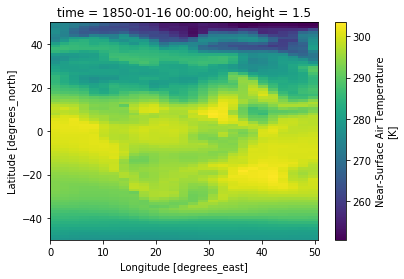

In [4]:
%matplotlib inline
da.plot()

## Subset over multiple datasets


In [5]:
ds_agg = xr.open_mfdataset([files[0], files[1]], chunks={'time': 1980})
print(ds_agg)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 144, lon: 192, time: 1980)
Coordinates:
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height     float64 1.5
  * time       (time) object 1850-01-16 00:00:00 ... 2014-12-16 00:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<shape=(1980, 2), chunksize=(1200, 2)>
    lat_bnds   (time, lat, bnds) float64 dask.array<shape=(1980, 144, 2), chunksize=(1200, 144, 2)>
    lon_bnds   (time, lon, bnds) float64 dask.array<shape=(1980, 192, 2), chunksize=(1200, 192, 2)>
    tas        (time, lat, lon) float32 dask.array<shape=(1980, 144, 192), chunksize=(1200, 144, 192)>
Attributes:
    _NCProperties:                   version=1|netcdflibversion=4.4.1|hdf5lib...
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     CMIP
    branch_method:            

In [6]:
da = ds_agg['tas']
da = da.isel(time=slice(1200, 1201))
da = da.sel(lat=slice(-50, 50), lon=slice(0, 50))

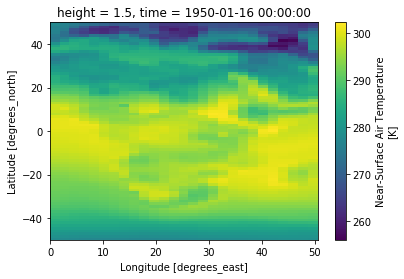

In [7]:
da.plot()

## Regrid with xESMF

xESMF based on xarray: https://xesmf.readthedocs.io/en/latest/Rectilinear_grid.html

### Input Grid

Grid resolution: 1.25 x 1.875

In [8]:
ds['lat'].values, ds['lon'].values

(array([-89.375, -88.125, -86.875, -85.625, -84.375, -83.125, -81.875,
        -80.625, -79.375, -78.125, -76.875, -75.625, -74.375, -73.125,
        -71.875, -70.625, -69.375, -68.125, -66.875, -65.625, -64.375,
        -63.125, -61.875, -60.625, -59.375, -58.125, -56.875, -55.625,
        -54.375, -53.125, -51.875, -50.625, -49.375, -48.125, -46.875,
        -45.625, -44.375, -43.125, -41.875, -40.625, -39.375, -38.125,
        -36.875, -35.625, -34.375, -33.125, -31.875, -30.625, -29.375,
        -28.125, -26.875, -25.625, -24.375, -23.125, -21.875, -20.625,
        -19.375, -18.125, -16.875, -15.625, -14.375, -13.125, -11.875,
        -10.625,  -9.375,  -8.125,  -6.875,  -5.625,  -4.375,  -3.125,
         -1.875,  -0.625,   0.625,   1.875,   3.125,   4.375,   5.625,
          6.875,   8.125,   9.375,  10.625,  11.875,  13.125,  14.375,
         15.625,  16.875,  18.125,  19.375,  20.625,  21.875,  23.125,
         24.375,  25.625,  26.875,  28.125,  29.375,  30.625,  31.875,
      

### Output Grid

resample to 2.5x3.75

In [9]:
import numpy as np

ds_out = xr.Dataset({'lat': (['lat'], np.arange(-89.375, 89.375, 2.5)),
                     'lon': (['lon'], np.arange(0.9375, 359.0625, 3.75)),
                    }
                   )
ds_out

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 96)
Coordinates:
  * lat      (lat) float64 -89.38 -86.88 -84.38 -81.88 ... 83.12 85.62 88.12
  * lon      (lon) float64 0.9375 4.688 8.438 12.19 ... 345.9 349.7 353.4 357.2
Data variables:
    *empty*

### Perform Regridder

In [10]:
import xesmf as xe

regridder = xe.Regridder(ds, ds_out, 'bilinear')
regridder

Overwrite existing file: bilinear_144x192_72x96.nc 
 You can set reuse_weights=True to save computing time.


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_144x192_72x96.nc 
Reuse pre-computed weights? False 
Input grid shape:           (144, 192) 
Output grid shape:          (72, 96) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      False

In [11]:
da_out = regridder(ds.tas)
da_out

<xarray.DataArray 'tas' (time: 1200, lat: 72, lon: 96)>
array([[[249.444824, 249.425293, ..., 249.450684, 249.444092],
        [251.668945, 251.371826, ..., 252.27417 , 251.981934],
        ...,
        [262.031006, 262.309814, ..., 260.299072, 261.303711],
        [258.253662, 258.414307, ..., 257.937988, 258.108887]],

       [[234.799072, 234.805664, ..., 234.819824, 234.795166],
        [236.866943, 236.560791, ..., 237.616211, 237.206543],
        ...,
        [239.421875, 239.609619, ..., 238.752686, 239.195801],
        [238.116943, 238.225342, ..., 237.863037, 238.004883]],

       ...,

       [[240.903564, 240.887695, ..., 240.941162, 240.937744],
        [239.949219, 239.637207, ..., 240.62915 , 240.225342],
        ...,
        [247.276611, 247.085938, ..., 247.646729, 247.48584 ],
        [244.712891, 244.73999 , ..., 244.76001 , 244.733398]],

       [[248.209229, 248.202637, ..., 248.219727, 248.210449],
        [249.376953, 249.134277, ..., 249.747803, 249.584961],
    

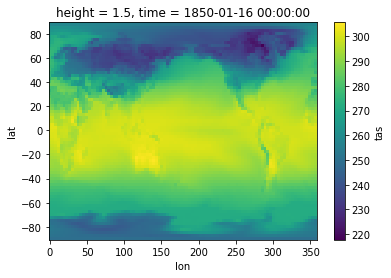

In [12]:
da_out.isel(time=0).plot()